# **Machine Predictive Maintenance Classification**

# **Import Library dan Dataset**

In [3]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
from sklearn import preprocessing

In [5]:
# Import Dataset
df = pd.read_csv('https://raw.githubusercontent.com/aqilaltf/Big_Data/main/predictive_maintenance.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


# **1. Carilah dataset tabular untuk masalah klasifikasi pada situs kaggle.com. Dataset harus  berbeda-beda untuk masing-masing mahasiswa. Tuliskan beberapa hal berikut:**

## **A. Jumlah Dataset**

In [ ]:
len(df)

10000

Dataset terdiri dari 10000 data

## **B. Jumlah Fitur** 

In [ ]:
# Melihat nama fitur
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [ ]:
#Melihat ukuran data frame(Baris X Kolom)
df.shape

(10000, 10)

Jumlah fitur pada dataset ini ada 10

## **C. Keterangan Fitur**

Dataset terdiri dari 10.000 titik data yang disimpan sebagai baris dengan 14 fitur dalam kolom

* **UID**: pengidentifikasi unik mulai dari 1 hingga 10.000
* **Product ID**: terdiri dari huruf L, M, atau H untuk low (50% dari semua produk), medium (30%), dan high (20%) sebagai varian kualitas produk dan nomor seri khusus varian
* **Type** : Tipe produk (Low, Medium, High)
* **Air Temperature [K]**: dibangkitkan menggunakan proses random walk kemudian dinormalisasi menjadi standar deviasi 2 K sekitar 300 K
* **Process Temperature [K]**: dihasilkan menggunakan proses random walk yang dinormalisasi ke standar deviasi 1 K, ditambahkan ke suhu udara ditambah 10 K.
* **Rotational Speed [rpm]**: dihitung dari daya 2860 W, dilapisi dengan noise yang terdistribusi normal
* **Torque [Nm]**: nilai torsi terdistribusi normal sekitar 40 Nm dengan = 10 Nm dan tidak ada nilai negatif.
* **Tool Wear [min]**: Varian kualitas H/M/L menambahkan 5/3/2 menit keausan pahat ke pahat yang digunakan dalam proses. dan label 'kegagalan mesin' yang menunjukkan, apakah mesin telah gagal dalam titik data khusus ini untuk salah satu mode kegagalan berikut adalah benar.
* **Target** : Gagal atau tidak
* **Failure Type** : Tipe Kegagalan

## **D. Tipe Fitur Data**

In [ ]:
#Melihat Tipe Data Masing-masing fitur
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

# **2. Masalah bisnis apa yang  mungkin diselesaikan menggunakan data tersebut?**

Masalah bisnis yang mungkin diselesaikan adalah dalam pemeliharaan prediktif mesin, kita dapat mengetahui apakah mesin tersebut terdapat kegagalan atau tidak. Sehingga, apabila terdapat kegagalan, dapat dilakukan tindakan sesuai masing-masing tipe kegagalannya.

# **3. Lakukan Data Preprocesing** 

## **A. Lakukan standarisasi nama kolom**

In [6]:
# Mengubah menjadi huruf kecil
df.columns = df.columns.str.lower()

In [7]:
# Mengubah spasi menjadi underscore
df.columns = [col.replace(" ", "_") for col in df.columns]
df.columns

Index(['udi', 'product_id', 'type', 'air_temperature_[k]',
       'process_temperature_[k]', 'rotational_speed_[rpm]', 'torque_[nm]',
       'tool_wear_[min]', 'target', 'failure_type'],
      dtype='object')

In [ ]:
# Melihat data yang sudah distandarisasi
df.head()

,udi,product_id,type,air_temperature_[k],process_temperature_[k],rotational_speed_[rpm],torque_[nm],tool_wear_[min],target,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


## **B. Adakah data kosong pada data yang Anda miliki?**

In [8]:
# Memeriksa jumlah missing data
df.isnull().sum()

udi                        0
product_id                 0
type                       0
air_temperature_[k]        0
process_temperature_[k]    0
rotational_speed_[rpm]     0
torque_[nm]                0
tool_wear_[min]            0
target                     0
failure_type               0
dtype: int64

Pada dataset ini tidak ada data kosong.

## **C. Adakah outlier pada data yang Anda miliki?**

Jika ada lakukan penghapusan outlier!

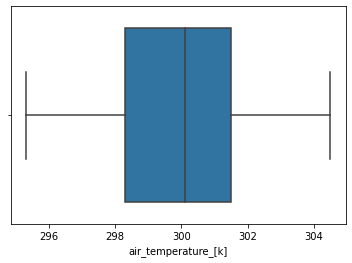

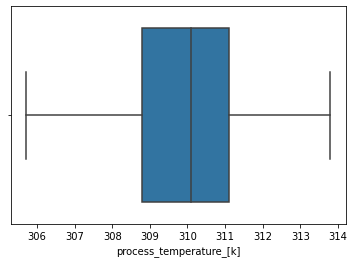

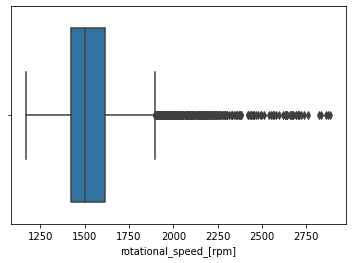

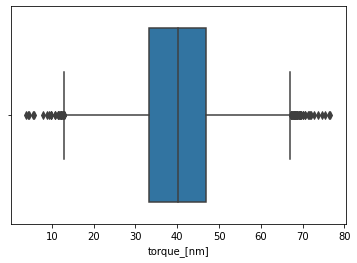

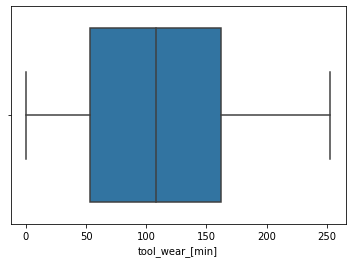

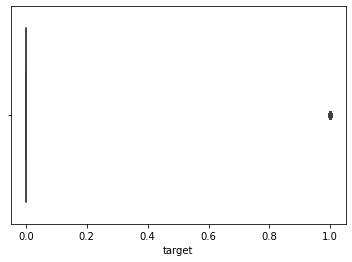

In [9]:
# Membuat boxplot
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['air_temperature_[k]'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['process_temperature_[k]'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['rotational_speed_[rpm]'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['torque_[nm]'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['tool_wear_[min]'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['target'])
plt.show()

In [10]:
# Mendeteksi outlier menggunakan metode Inter quartile range (IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

udi                        4999.5
air_temperature_[k]           3.2
process_temperature_[k]       2.3
rotational_speed_[rpm]      189.0
torque_[nm]                  13.6
tool_wear_[min]             109.0
target                        0.0
dtype: float64


In [11]:
# Menghapus Outlier
df_1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_1

<ipython-input-11-ccf32d72374a>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


,udi,product_id,type,air_temperature_[k],process_temperature_[k],rotational_speed_[rpm],torque_[nm],tool_wear_[min],target,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


Dataset di atas adalah data yang sudah dilakukan penghapusan outlier.

## **D. Lakukan plot histogram distribusi pada setiap fitur**

Jika terindikasi bukan  berdistribusi normal. Lakukan normalisasi pada fitur tersebut!

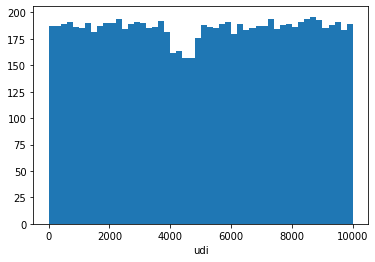

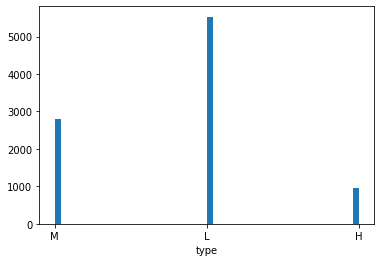

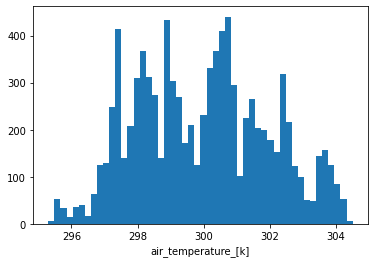

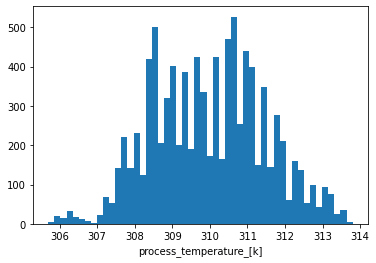

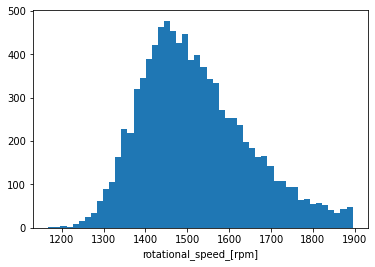

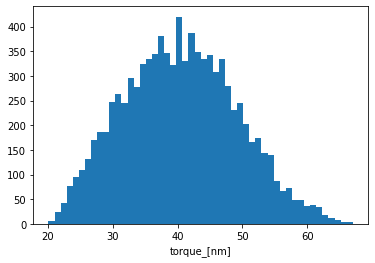

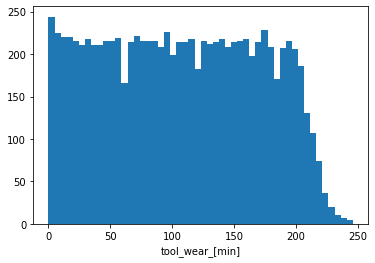

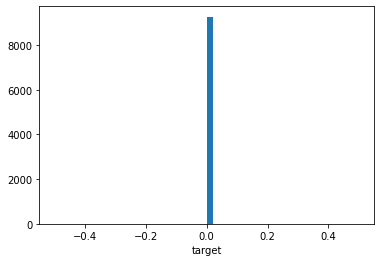

In [12]:
# Membuat plot histogram
# udi
plt.hist(df_1['udi'], bins=50)
plt.xlabel("udi")
plt.show() 

# type
plt.hist(df_1['type'], bins=50)
plt.xlabel("type")
plt.show() 

# air temperature
plt.hist(df_1['air_temperature_[k]'], bins=50) 
plt.xlabel("air_temperature_[k]")
plt.show()

# process temperature [k]
plt.hist(df_1['process_temperature_[k]'], bins=50) 
plt.xlabel("process_temperature_[k]")
plt.show()

# rotational speed [rpm]
plt.hist(df_1['rotational_speed_[rpm]'], bins=50) 
plt.xlabel("rotational_speed_[rpm]")
plt.show()

# torque [nm]	
plt.hist(df_1['torque_[nm]'], bins=50) 
plt.xlabel("torque_[nm]")
plt.show() 

# tool wear [min]
plt.hist(df_1['tool_wear_[min]'], bins=50) 
plt.xlabel("tool_wear_[min]")
plt.show()

# target
plt.hist(df_1['target'], bins=50) 
plt.xlabel("target")
plt.show() 

In [13]:
# Melakukan normalisasi data
df_2=df_1.select_dtypes(include=['float64', 'int64']) # Memilih data numerik
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df_2)
df_nor = pd.DataFrame(d, columns=df_2.columns)
df_nor

,udi,air_temperature_[k],process_temperature_[k],rotational_speed_[rpm],torque_[nm],tool_wear_[min],target
0,0.0000,0.304348,0.358025,0.526823,0.484009,0.000000,0.0
1,0.0001,0.315217,0.370370,0.330124,0.558635,0.012195,0.0
2,0.0002,0.304348,0.345679,0.453920,0.624733,0.020325,0.0
3,0.0003,0.315217,0.358025,0.364512,0.413646,0.028455,0.0
4,0.0004,0.315217,0.370370,0.330124,0.424307,0.036585,0.0
...,...,...,...,...,...,...,...
9269,0.9996,0.380435,0.333333,0.599725,0.200426,0.056911,0.0
9270,0.9997,0.391304,0.333333,0.638239,0.249467,0.069106,0.0
9271,0.9998,0.402174,0.358025,0.656121,0.283582,0.089431,0.0
9272,0.9999,0.402174,0.370370,0.330124,0.605544,0.101626,0.0


Dataset di atas adalah data yang sudah dilakukan normalisasi.

## **E. Jika data Anda belum dibagi manjadi data Training & Testing. lakukan pembagian data training  dan testing dengan perbandingan 80:20!**

In [ ]:
Y=df_nor['target']
X=df_nor.drop(columns=['target'])

# Mengubah data menjadi array
Y=np.array(Y)
X=np.array(X)


In [ ]:
# Membagi data menjadi data training dan data testing dengan perbandingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=0)

In [ ]:
X_train

array([[0.99939994, 0.38043478, 0.33333333, 0.32049519, 0.57995736,
        0.04065041],
       [0.11361136, 0.17391304, 0.25925926, 0.53507565, 0.38379531,
        0.54878049],
       [0.74167417, 0.52173913, 0.67901235, 0.39064649, 0.47547974,
        0.77235772],
       ...,
       [0.53045305, 0.93478261, 0.91358025, 0.35350757, 0.62260128,
        0.80894309],
       [0.34733473, 0.70652174, 0.62962963, 0.71939477, 0.28358209,
        0.25203252],
       [0.29062906, 0.57608696, 0.44444444, 0.33149931, 0.39658849,
        0.46747967]])

In [ ]:
X_test

array([[0.90959096, 0.2173913 , 0.2962963 , 0.39889959, 0.54584222,
        0.82113821],
       [0.27412741, 0.4673913 , 0.40740741, 0.28885832, 0.67803838,
        0.65853659],
       [0.57025703, 0.76086957, 0.74074074, 0.51719395, 0.49253731,
        0.5203252 ],
       ...,
       [0.27192719, 0.45652174, 0.43209877, 0.71801926, 0.19402985,
        0.43902439],
       [0.64116412, 0.55434783, 0.5308642 , 0.5392022 , 0.47334755,
        0.75609756],
       [0.46244624, 0.83695652, 0.66666667, 0.35763411, 0.42004264,
        0.73577236]])

In [ ]:
y_train

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
y_test

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

7419
1855
7419
1855


Membagi data training dan data testing dengan masing-masing datanya sebanyak 7412 dan 1855 (perbandingan 80:20).

# **4. Lakukan Eksploratory Data Analysis**

5 insight penting pada data yang Anda  peroleh. Sajikan hal tersebut melalui visualisasi data menggunakan tools visualisasi Python seperti  Matplotlib, Seaborn, dan Plotly!

In [22]:
# Melihat berapa banyak mesin yang mengalami kegagalan dan tidak
px.pie(df, values='udi', names='target')

Dari plot di atas ternyata mesin yang tidak mengalami kegagalan sebanyak 96.8% dan mesin yang mengalami kegagalan sebanyak 3.15%.

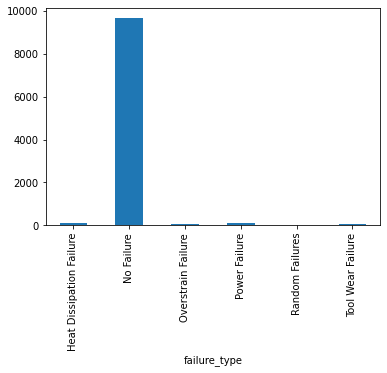

In [23]:
# Melihat berapa banyak masing-masing tipe kegagalan
df.groupby(['failure_type'])['udi'].count().plot.bar()

Dari plot di atas ternyata yang paling banyak adalah mesin dengan tidak adanya kegagalan.

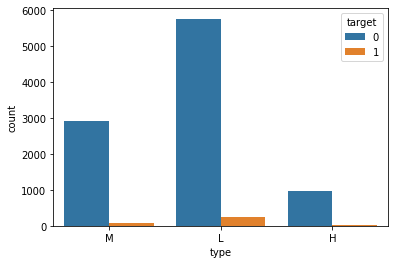

In [24]:
# Tipe produk terhadap target
sns.countplot(x='type', data=df, hue='target')

Dari plot di atas diperoleh bahwa pada tipe produk Low (L), Medium (M), dan High (H) yang paling banyak adalah tidak ada kegagalan dan mesin yang paling  banyak adalah tipe Low.

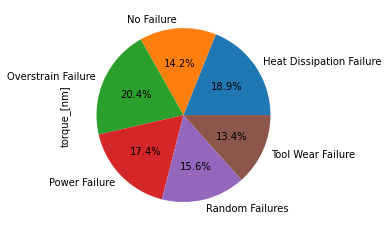

In [25]:
# Tipe kegagalan mesin terhadap torque
df.groupby('failure_type')['torque_[nm]'].mean().plot.pie(autopct='%1.1f%%')

Dari plot di atas ternyata pada fitur nilai torsi, tipe kegagalan yang paling banyak terjadi adalah overstrain failure (kegagalan regangan berlebih) sebanyak 20.4%.

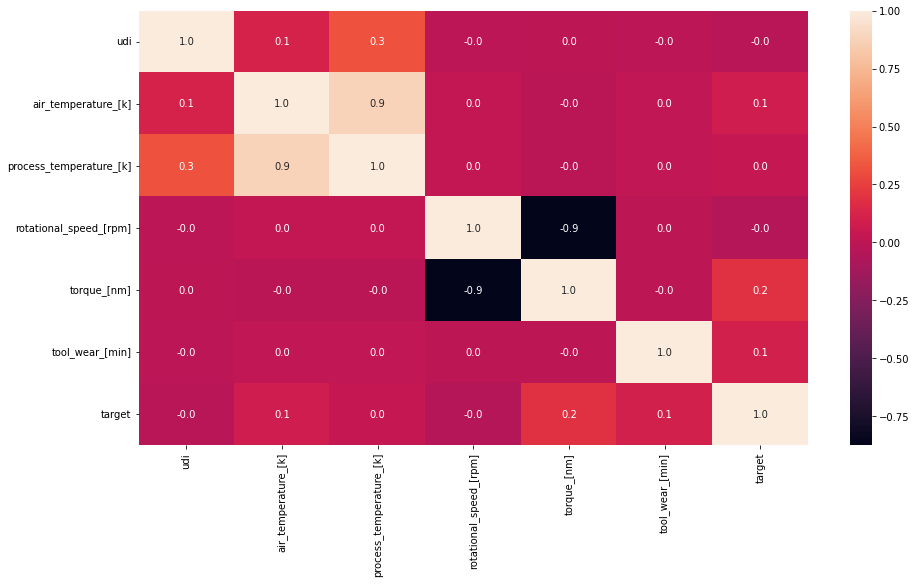

In [26]:
# Korelasi antar variabel numerik
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True, fmt="1.1f")

Pada figur di atas menampilkan korelasi antara variabel numerik. Terlihat bahwa pada variabel air temperature dengan target memiliki korelasi sebesar 0.1.